In [1]:
import pandas as pd
import geopandas as gpd
import shapely
from shapely.wkt import loads

In [36]:
rail_station_count =pd.read_csv(r'D:\bike\code\metro\Preprocessing-bike data\metro_area.csv').drop(columns = 'Unnamed: 0')

In [37]:
geometry = rail_station_count['geometry'].map(shapely.wkt.loads)
rail_station_count = rail_station_count.drop('geometry', axis=1)
rail_station_count = gpd.GeoDataFrame(rail_station_count, geometry=geometry)
rail_station_count = rail_station_count.set_crs("EPSG:4326")

In [38]:
rail_station = rail_station_count.to_crs("EPSG:32649")
rail_station['buffer'] = rail_station.buffer(1500)

In [39]:
rail_station

,linename,stationnam,sl,poiid,lg,sp,lon,lat,index_right,hex_id,cluster_la,functional,function_1,geometry,buffer
0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,2414,30444,0,Rural,4,POINT (820809.311 2495070.993),"POLYGON ((822309.311 2495070.993, 822302.088 2..."
1,地铁9号线,人民南,"114.118154,22.535514",BV10447615,0,ren min nan,114.118154,22.535514,2414,30444,0,Rural,4,POINT (820748.669 2495450.082),"POLYGON ((822248.669 2495450.082, 822241.446 2..."
2,地铁1号线(罗宝线),国贸,"114.118909,22.539680",BV10243546,2,guo mao,114.118909,22.539680,2415,30445,1,Center,1,POINT (820816.745 2495913.339),"POLYGON ((822316.745 2495913.339, 822309.522 2..."
3,地铁1号线(罗宝线),老街,"114.116939,22.544232",BV10249964,2,lao jie,114.116939,22.544232,2411,30441,1,Center,1,POINT (820603.435 2496413.511),"POLYGON ((822103.435 2496413.511, 822096.212 2..."
4,地铁1号线(罗宝线),大剧院,"114.107811,22.541800",BV10246013,3,DaJuYuan,114.107811,22.541800,2410,30440,1,Center,1,POINT (819669.497 2496124.436),"POLYGON ((821169.497 2496124.436, 821162.274 2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,地铁11号线,福永,"113.806076,22.673562",BV10249452,0,FuYong,113.806076,22.673562,1433,18097,2,Sub-center,2,POINT (788339.380 2510107.183),"POLYGON ((789839.380 2510107.183, 789832.157 2..."
230,地铁11号线,机场,"113.813663,22.624026",BV10527864,6,ji chang,113.813663,22.624026,944,10976,3,Outskirt,3,POINT (789223.295 2504633.877),"POLYGON ((790723.295 2504633.877, 790716.072 2..."
231,地铁11号线,碧海湾,"113.856093,22.575073",BV10527859,6,bi hai wan,113.856093,22.575073,1960,24808,1,Center,1,POINT (793691.303 2499293.417),"POLYGON ((795191.303 2499293.417, 795184.080 2..."
232,地铁11号线,宝安,"113.880396,22.554590",BV10527865,6,bao an,113.880396,22.554590,2574,33438,1,Center,1,POINT (796235.679 2497072.139),"POLYGON ((797735.679 2497072.139, 797728.456 2..."


In [40]:
rail_station_buffer = gpd.GeoDataFrame(rail_station,geometry = 'buffer')
rail_station_buffer = rail_station_buffer.drop(columns = 'index_right')

# bus_station

In [41]:
df = gpd.read_file(r"D:\bike\data\bus_station_shp\bus_station_point.shp")

In [42]:
df.head()

,match,id_station,location,name,sequence,id,busstops,lng,lat,geometry
0,0,BV10242435,"114.118955,22.531607",火车站,1,440300014163,"[{'id': 'BV10242435', 'location': '114.118955,...",114.118955,22.531607,POINT (114.11895 22.53161)
1,1,BV11042896,"114.118993,22.534839",人民南地铁站,2,440300014163,"[{'id': 'BV10242435', 'location': '114.118955,...",114.118993,22.534839,POINT (114.11899 22.53484)
2,2,BV11161011,"114.118797,22.537426",罗湖小学2,3,440300014163,"[{'id': 'BV10242435', 'location': '114.118955,...",114.118797,22.537426,POINT (114.11880 22.53743)
3,3,BV11354437,"114.118689,22.540595",国贸1,4,440300014163,"[{'id': 'BV10242435', 'location': '114.118955,...",114.118689,22.540595,POINT (114.11869 22.54059)
4,4,BV10382979,"114.121866,22.547661",东门3,5,440300014163,"[{'id': 'BV10242435', 'location': '114.118955,...",114.121866,22.547661,POINT (114.12187 22.54766)


In [43]:
len(df)

26406

In [44]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

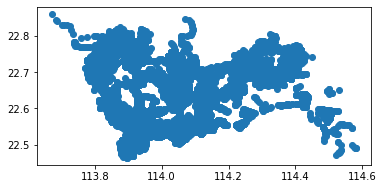

In [45]:
df.plot()

In [46]:
df = df.to_crs('epsg:32649')

In [47]:
df_poi_bus = gpd.sjoin(rail_station_buffer,df,predicate = 'contains')

In [48]:
df_poi_bus

,linename,stationnam,sl,poiid,lg,sp,lon,lat_left,hex_id,cluster_la,...,index_right,match,id_station,location,name,sequence,id,busstops,lng,lat_right
0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,30444,0,...,2132,9,BV10382908,"114.119453,22.543364",门诊部1,10,440300014212,"[{'id': 'BV10435126', 'location': '114.144306,...",114.119453,22.543364
1,地铁9号线,人民南,"114.118154,22.535514",BV10447615,0,ren min nan,114.118154,22.535514,30444,0,...,2132,9,BV10382908,"114.119453,22.543364",门诊部1,10,440300014212,"[{'id': 'BV10435126', 'location': '114.144306,...",114.119453,22.543364
2,地铁1号线(罗宝线),国贸,"114.118909,22.539680",BV10243546,2,guo mao,114.118909,22.539680,30445,1,...,2132,9,BV10382908,"114.119453,22.543364",门诊部1,10,440300014212,"[{'id': 'BV10435126', 'location': '114.144306,...",114.119453,22.543364
3,地铁1号线(罗宝线),老街,"114.116939,22.544232",BV10249964,2,lao jie,114.116939,22.544232,30441,1,...,2132,9,BV10382908,"114.119453,22.543364",门诊部1,10,440300014212,"[{'id': 'BV10435126', 'location': '114.144306,...",114.119453,22.543364
4,地铁1号线(罗宝线),大剧院,"114.107811,22.541800",BV10246013,3,DaJuYuan,114.107811,22.541800,30440,1,...,2132,9,BV10382908,"114.119453,22.543364",门诊部1,10,440300014212,"[{'id': 'BV10435126', 'location': '114.144306,...",114.119453,22.543364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,地铁11号线,碧海湾,"113.856093,22.575073",BV10527859,6,bi hai wan,113.856093,22.575073,24808,1,...,18925,23,BV10242779,"113.855182,22.588234",华万工业园,24,440300013834,"[{'id': 'BV10243946', 'location': '113.967205,...",113.855182,22.588234
231,地铁11号线,碧海湾,"113.856093,22.575073",BV10527859,6,bi hai wan,113.856093,22.575073,24808,1,...,19851,14,BV10242779,"113.855169,22.588242",华万工业园,15,900000101053,"[{'id': 'BV10949511', 'location': '113.886486,...",113.855169,22.588242
231,地铁11号线,碧海湾,"113.856093,22.575073",BV10527859,6,bi hai wan,113.856093,22.575073,24808,1,...,22454,5,BV10247002,"113.847938,22.581632",固戍污水厂,6,900000062335,"[{'id': 'BV10246444', 'location': '113.861944,...",113.847938,22.581632
231,地铁11号线,碧海湾,"113.856093,22.575073",BV10527859,6,bi hai wan,113.856093,22.575073,24808,1,...,25304,34,BV10247002,"113.847893,22.581667",固戍污水厂,35,900000083131,"[{'id': 'BV11282363', 'location': '113.944808,...",113.847893,22.581667


In [49]:
bus = df_poi_bus.groupby(by = 'stationnam').count()[['id_station']].reset_index()

In [50]:
bus = bus.rename(columns = {'id_station':'bus_num'})

In [51]:
bus

,stationnam,bus_num
0,上塘,234
1,上屋,259
2,上李朗,162
3,上梅林,188
4,上水径,164
...,...,...
229,黄贝岭,397
230,龙井,129
231,龙华,492
232,龙城广场,319


In [52]:
bus.to_csv(r"D:\bike\code\metro\Preprocessing-bike data\code\day_buffer\variable\bus_number_1500.csv",encoding = 'utf-8-sig')

# railway_station

In [17]:
rail_station= gpd.read_file(r"D:\bike\code\metro\bus\metro_point_2021.shp")
rail_station

,linename,stationnam,sl,poiid,lg,sp,lon,lat,geometry
0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,POINT (114.11867 22.53208)
1,地铁1号线(罗宝线),国贸,"114.118909,22.539680",BV10243546,2,guo mao,114.118909,22.539680,POINT (114.11891 22.53968)
2,地铁1号线(罗宝线),老街,"114.116939,22.544232",BV10249964,2,lao jie,114.116939,22.544232,POINT (114.11694 22.54423)
3,地铁1号线(罗宝线),大剧院,"114.107811,22.541800",BV10246013,3,DaJuYuan,114.107811,22.541800,POINT (114.10781 22.54180)
4,地铁1号线(罗宝线),大剧院,"114.107811,22.541800",BV10246013,3,DaJuYuan,114.107811,22.541800,POINT (114.10781 22.54180)
...,...,...,...,...,...,...,...,...,...
281,地铁11号线,后海,"113.942498,22.518422",BV10249990,3,HouHai,113.942498,22.518422,POINT (113.94250 22.51842)
282,地铁11号线,红树湾南,"113.971433,22.523023",BV10729670,3,hong shu wan nan,113.971433,22.523023,POINT (113.97143 22.52302)
283,地铁11号线,车公庙,"114.025830,22.536247",BV10249928,5,che gong miao,114.025830,22.536247,POINT (114.02583 22.53625)
284,地铁11号线,福田,"114.052879,22.540087",BV10249929,3,FuTian,114.052879,22.540087,POINT (114.05288 22.54009)


In [18]:
rail_station = rail_station.set_crs('epsg:4326')
rail_station = rail_station.to_crs('epsg:32649')

In [19]:
df_poi_rail = gpd.sjoin(rail_station_buffer,rail_station,predicate = 'contains')

In [20]:
rail = df_poi_rail.groupby(by = 'stationnam_left').count()[['stationnam_right']].reset_index()

In [21]:
rail

,stationnam_left,stationnam_right
0,上塘,1
1,上屋,1
2,上李朗,1
3,上梅林,2
4,上水径,1
...,...,...
229,黄贝岭,2
230,龙井,1
231,龙华,1
232,龙城广场,1


In [22]:
rail.columns = ['stationnam','metro_number']

In [23]:
rail

,stationnam,metro_number
0,上塘,1
1,上屋,1
2,上李朗,1
3,上梅林,2
4,上水径,1
...,...,...
229,黄贝岭,2
230,龙井,1
231,龙华,1
232,龙城广场,1


# bus_metro_varibales

In [24]:
station = rail_station_count.merge(bus,how = 'outer', on = 'stationnam')

In [25]:
station = station.merge(rail,how = 'outer', on = 'stationnam')

In [26]:
station.fillna(0,inplace = True)

In [27]:
station

,linename,stationnam,sl,poiid,lg,sp,lon,lat,index_right,hex_id,cluster_la,functional,function_1,geometry,id_station,metro_number
0,地铁1号线(罗宝线),罗湖,"114.118666,22.532083",BV10249978,2,luo hu,114.118666,22.532083,2414,30444,0,Rural,4,POINT (114.11867 22.53208),26,1
1,地铁9号线,人民南,"114.118154,22.535514",BV10447615,0,ren min nan,114.118154,22.535514,2414,30444,0,Rural,4,POINT (114.11815 22.53551),45,1
2,地铁1号线(罗宝线),国贸,"114.118909,22.539680",BV10243546,2,guo mao,114.118909,22.539680,2415,30445,1,Center,1,POINT (114.11891 22.53968),43,1
3,地铁1号线(罗宝线),老街,"114.116939,22.544232",BV10249964,2,lao jie,114.116939,22.544232,2411,30441,1,Center,1,POINT (114.11694 22.54423),11,2
4,地铁1号线(罗宝线),大剧院,"114.107811,22.541800",BV10246013,3,DaJuYuan,114.107811,22.541800,2410,30440,1,Center,1,POINT (114.10781 22.54180),23,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,地铁11号线,福永,"113.806076,22.673562",BV10249452,0,FuYong,113.806076,22.673562,1433,18097,2,Sub-center,2,POINT (113.80608 22.67356),22,1
230,地铁11号线,机场,"113.813663,22.624026",BV10527864,6,ji chang,113.813663,22.624026,944,10976,3,Outskirt,3,POINT (113.81366 22.62403),9,1
231,地铁11号线,碧海湾,"113.856093,22.575073",BV10527859,6,bi hai wan,113.856093,22.575073,1960,24808,1,Center,1,POINT (113.85609 22.57507),19,1
232,地铁11号线,宝安,"113.880396,22.554590",BV10527865,6,bao an,113.880396,22.554590,2574,33438,1,Center,1,POINT (113.88040 22.55459),21,1


In [28]:
station.to_csv(r"D:\bike\code\metro\Preprocessing-bike data\code\day_buffer\variable\station_variable_500.csv",encoding = 'utf-8-sig')